# Task 1:
## Load the dataset into a Python notebook and test the performance of the following models:
- k-Nearest Neighbour
- Decision Tree
- Logistic Regression
- Random Forest 

Your evaluation should use hold-out testing and should consider accuracy, precision and recall. You should also include confusion matrices for the four models. You should discuss the results in markdown in the notebook. 

## 1. k-Nearest Neighbour

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [2]:
dry_bean_df = pd.read_csv('Dry_Bean_Dataset.csv')
dry_bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
dry_bean_df.shape

(13611, 17)

In [4]:
# Check for missing values in the dataset
missing_values = dry_bean_df.isnull().sum()
missing_values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

- As we can see from the result, there are no missing values in the dataset.

#### Let's calculate the percentage of each bean class to see if there's any imbalance  

In [5]:
# Count the occurrences of each class
class_counts = dry_bean_df['Class'].value_counts()

# Calculate the percentage for each class
class_percentage = (class_counts / class_counts.sum()) * 100

class_percentage

DERMASON    26.052458
SIRA        19.366689
SEKER       14.892366
HOROZ       14.165014
CALI        11.975608
BARBUNYA     9.712732
BOMBAY       3.835133
Name: Class, dtype: float64

#### Here's the bar chart visualizing the distribution of bean classes. As shown, "DERMASON" has the highest percentage, followed by "SIRA", "SEKER", and so on.

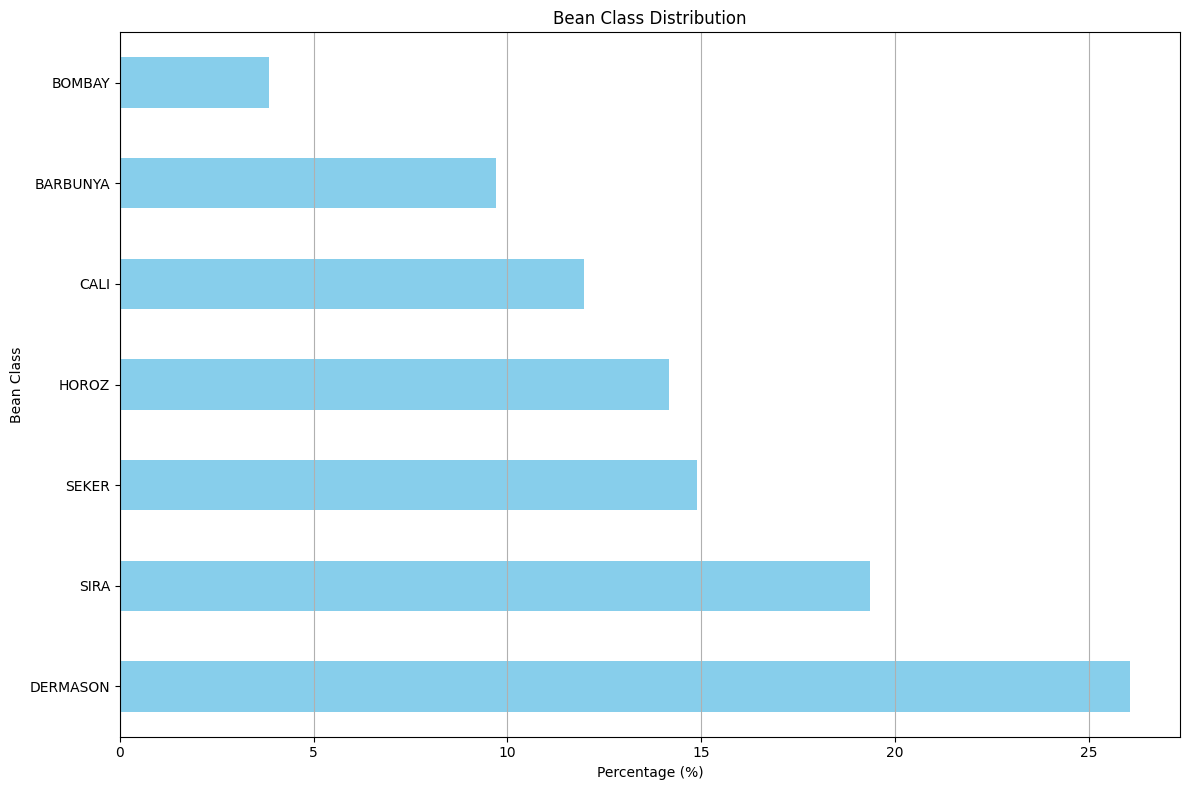

In [6]:
# Bar chart visualization
plt.figure(figsize=(12, 8))
class_percentage.plot(kind='barh', color='skyblue')
plt.title('Bean Class Distribution')
plt.ylabel('Bean Class')
plt.xlabel('Percentage (%)')
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

- Accuracy:

Impact: In imbalanced datasets, accuracy can be misleading. A model that naively predicts the majority class for all instances can still achieve a high accuracy, especially if the majority class dominates the dataset.

Example: If "DERMASON" beans make up 90% of a dataset, a model that predicts "DERMASON" for every sample would be 90% accurate, even though it's not making meaningful predictions.

- Precision, Recall, and F1-Score:

Impact: In imbalanced datasets, the minority class often has a lower recall, as the model may miss many of the positive instances (true positives) for the minority class. Precision might be high if the model is very conservative and only predicts the minority class when it's very certain. The F1-score, which balances precision and recall, can also be affected.

Example: If the model rarely predicts the "BOMBAY" class because of its small presence, the recall for "BOMBAY" will be low. However, if the few predictions it makes for "BOMBAY" are correct, then precision will be high.

- Confusion Matrix:

Impact: In imbalanced datasets, the confusion matrix will often show a large number of true negatives (because of the dominant majority class) and might have a higher number of false negatives for the minority class, indicating missed predictions.

### 1.1 Data Normalization

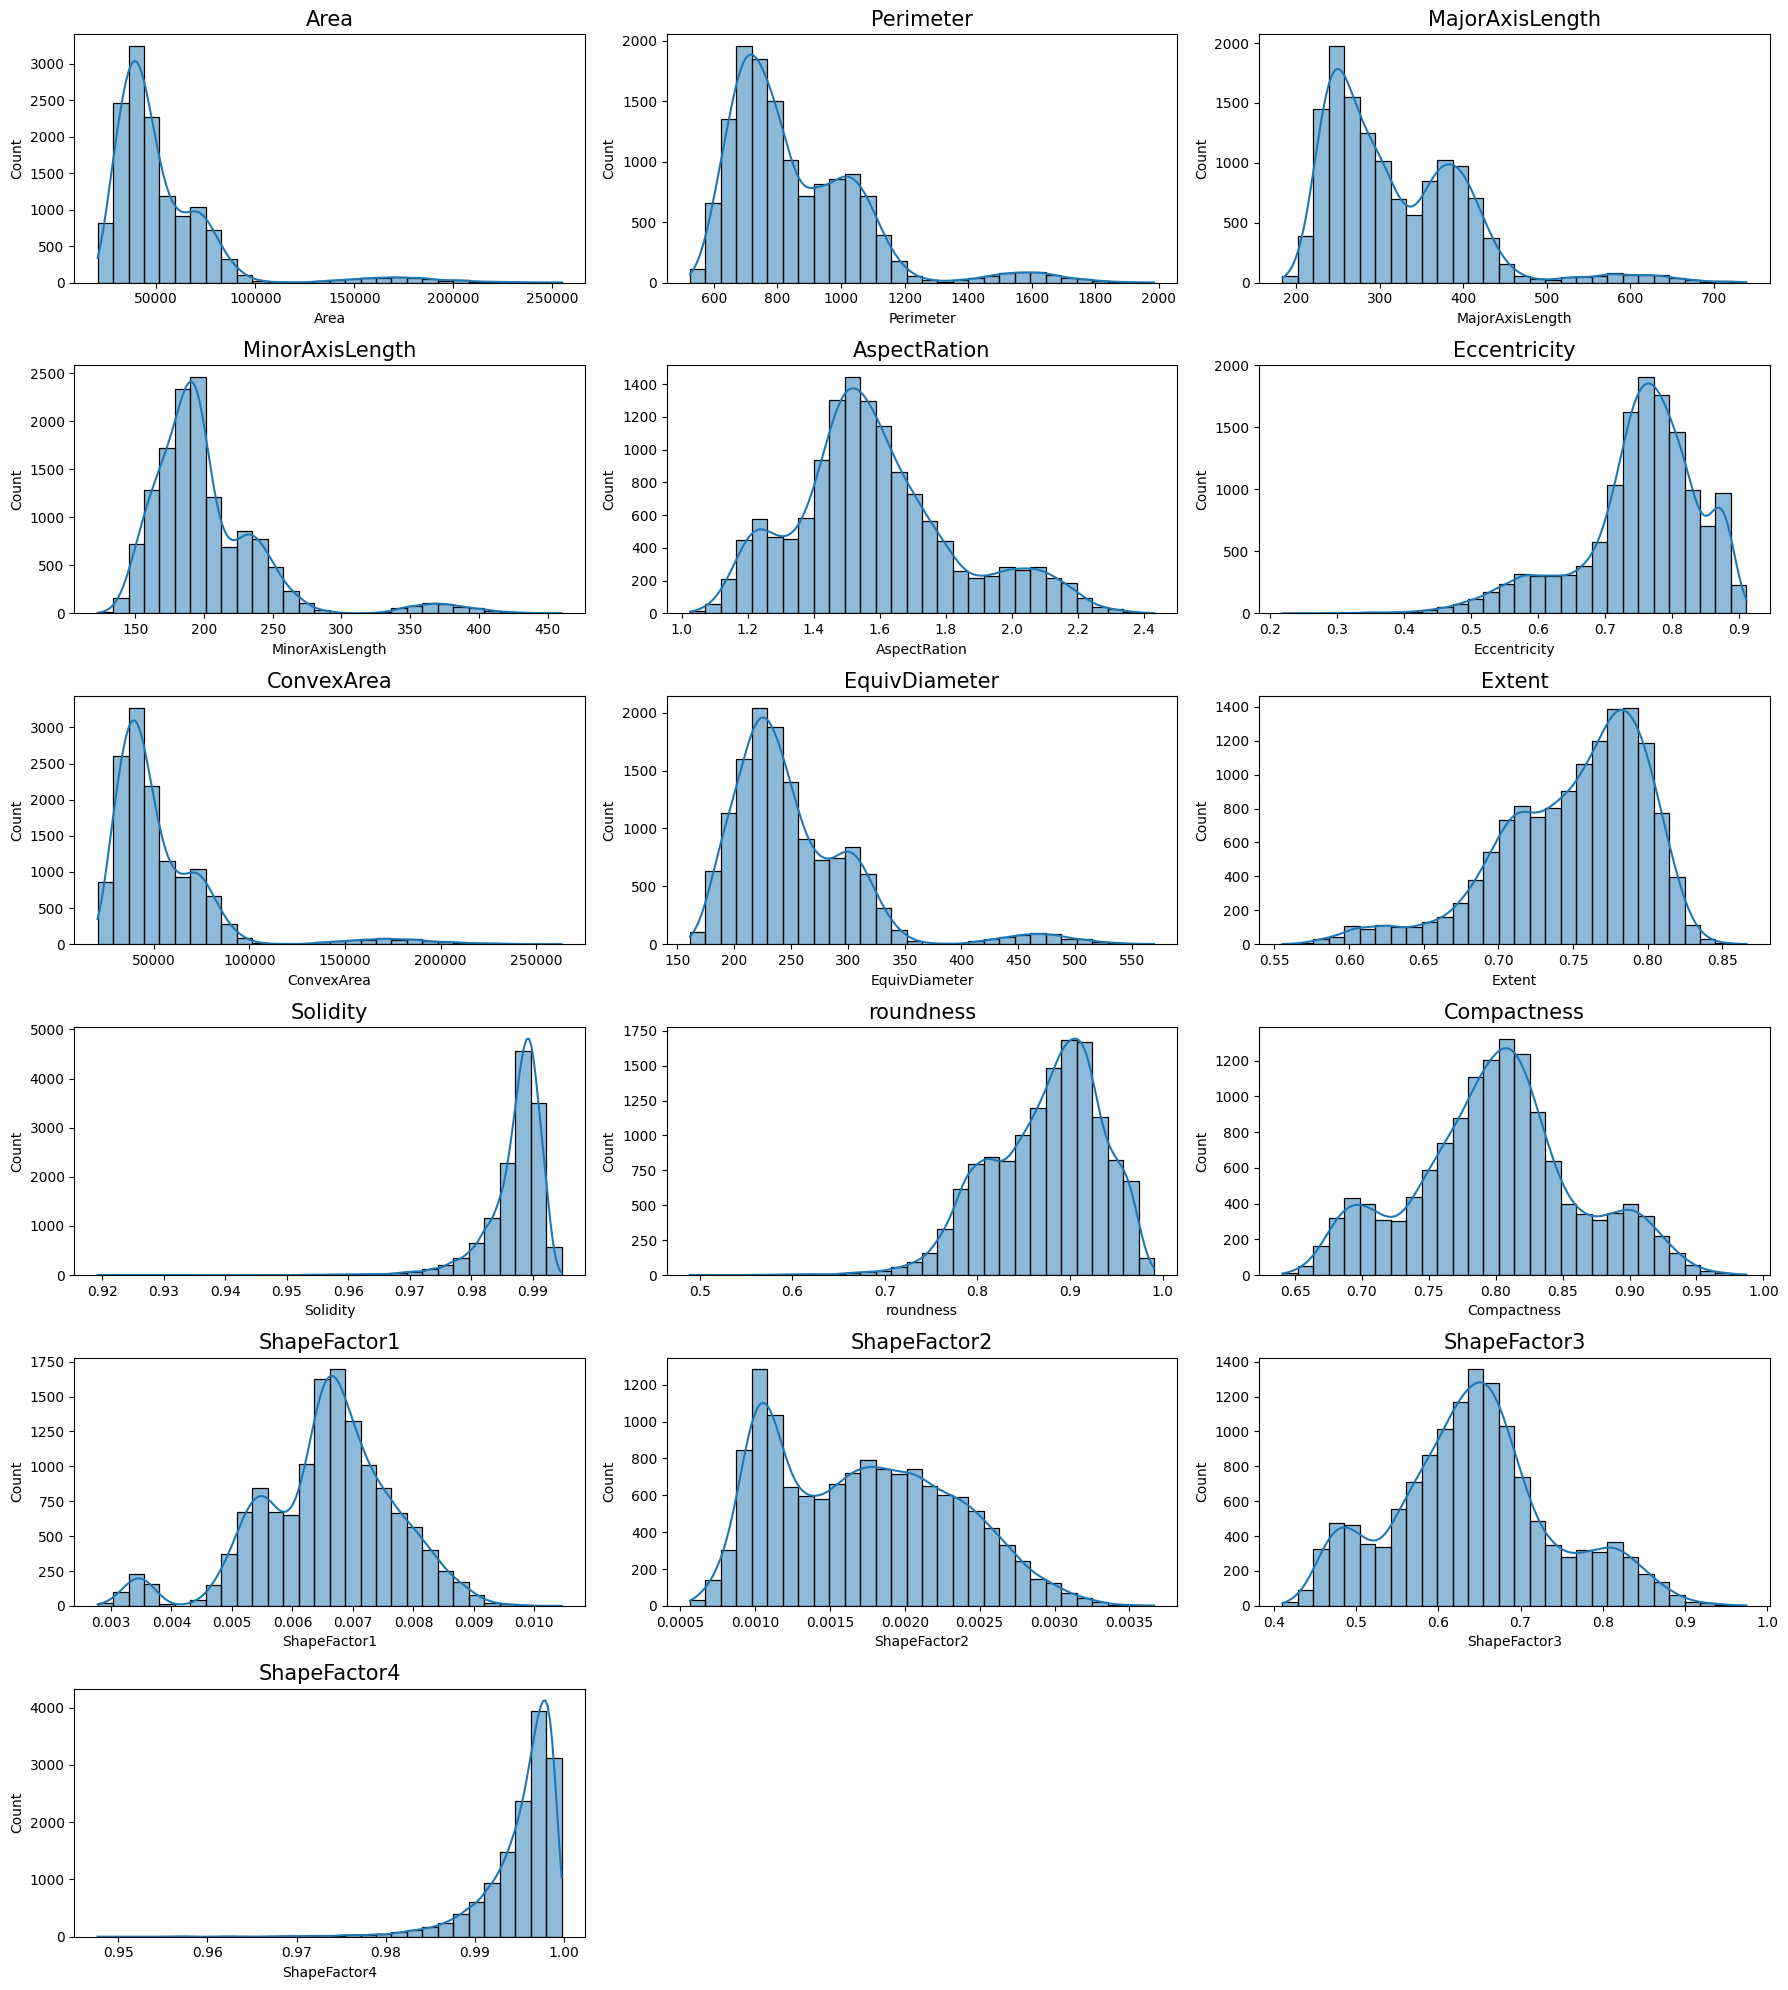

In [7]:
# Plot the frequency distribution (histogram) for each feature
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 20))

for i, column in enumerate(dry_bean_df.columns[:-1]):  # Excluding the 'Class' column
    sns.histplot(dry_bean_df[column], ax=axes[i//3, i%3], bins=30, kde=True)
    axes[i//3, i%3].set_title(column, fontsize=15)

# Remove any unused subplots
for j in range(i+1, 6*3):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

- Z-score Normalization tends to center the data around zero and scales it based on the standard deviation. This means that the shape of the distribution remains relatively similar to the original, but the range is standardized.
- This is particularly useful for algorithms like kNN, which rely on distances between data points. Z-score normalization ensures that each feature contributes equally to the distance computation.
- If a feature has extreme values or outliers, then the majority of the scaled values could be clustered in a small range for Min-Max Scaling.

In [8]:
# Instantiate the scaler
std_scaler = StandardScaler()

# Columns to normalize (excluding 'Class')
columns_to_normalize = dry_bean_df.columns[:-1]

# Z-score normalization
normalized_features = std_scaler.fit_transform(dry_bean_df[columns_to_normalize])

# Create a copy of the original dataframe and update with normalized features
dry_bean_df_normalized = dry_bean_df.copy()
dry_bean_df_normalized[columns_to_normalize] = normalized_features

# Display the first few rows of the Z-score normalized dataset
dry_bean_df_normalized.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.840749,-1.143319,-1.306598,-0.631153,-1.565053,-2.185720,-0.841451,-1.063341,0.289087,0.367614,1.423867,1.839116,0.680786,2.402173,1.925723,0.838371,SEKER
1,-0.829188,-1.013924,-1.395911,-0.434445,-1.969784,-3.686040,-0.826102,-1.044217,0.697477,-0.462907,0.231054,2.495449,0.367967,3.100894,2.689702,0.771138,SEKER
2,-0.807157,-1.078829,-1.252357,-0.585735,-1.514291,-2.045336,-0.808704,-1.008084,0.578195,0.518417,1.252865,1.764843,0.603129,2.235091,1.841356,0.916755,SEKER
3,-0.785741,-0.977215,-1.278825,-0.439290,-1.741618,-2.742211,-0.773975,-0.973337,0.671260,-2.241767,0.515049,2.081715,0.401718,2.515075,2.204250,-0.197985,SEKER
4,-0.781239,-1.097384,-1.380471,-0.266663,-2.117993,-4.535028,-0.784286,-0.966080,0.476020,0.804772,1.874992,2.765330,0.118268,3.270983,3.013462,0.939640,SEKER


In [9]:
# Split the normalized data into features (X) and target labels (y)
X_normalized = dry_bean_df_normalized.drop('Class', axis=1)
y_normalized = dry_bean_df_normalized['Class']

### 1.2 Plot the different accuracies of the kNN model for various training sizes

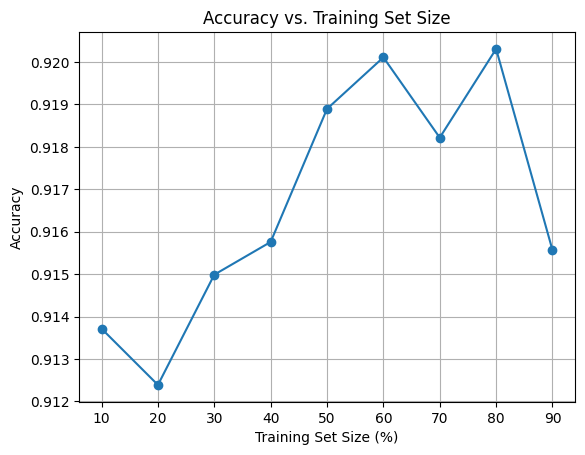

In [10]:
accuracies = []

# Iterate over train sizes from 10% to 100% (with a gap of 10%)
for train_size in np.arange(0.1, 1.0, 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, train_size=train_size, random_state=10)
    
    # Train a model (using a simple classifier here for demonstration)
    clf_knn = KNeighborsClassifier()
    clf_knn.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = clf_knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
train_sizes = np.arange(10, 100, 10)  

plt.plot(train_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Set Size')
plt.xticks(train_sizes)
plt.grid(True)
plt.show()


- As we can see when training set size = 80%, we get the highest accuacy. So I'll split the with test_size=0.2.

In [11]:
# Split data into training and testing sets (80% train, 20% test)
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y_normalized, test_size=0.20, random_state=10)

### 1.3 k-NN Classifier

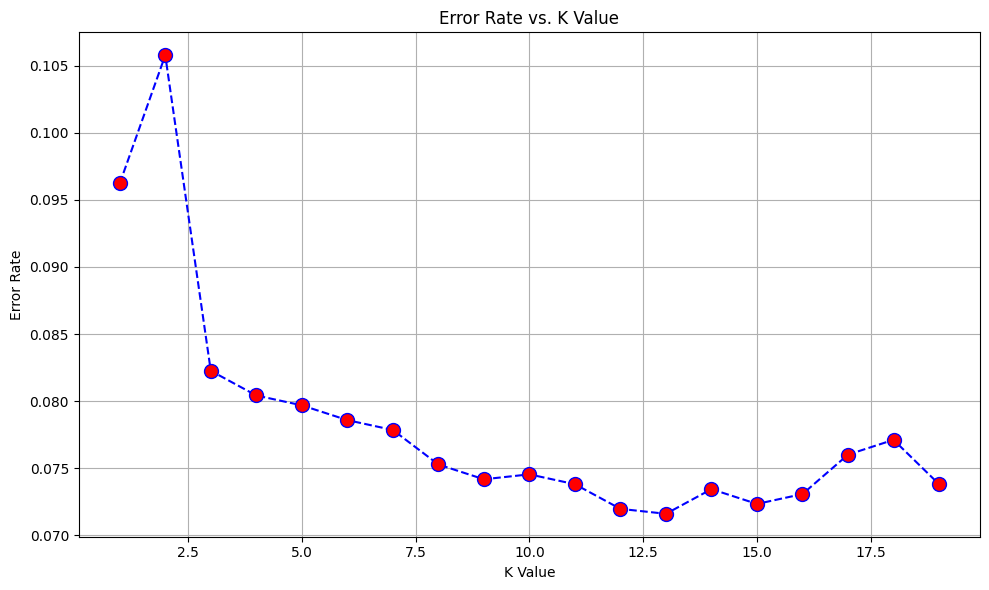

In [12]:
 # List to store error rates for each 'k'
error_rates = []

# Range of 'k' values we want to test (e.g., from 1 to 20)
k_values = range(1, 20)

# For each value of 'k', train a kNN model and compute the error rate
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_norm, y_train_norm)
    y_pred_k = knn_model.predict(X_test_norm)
    error_rates.append(np.mean(y_pred_k != y_test_norm))

# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

- As we can see from the curve, when 'n_neighbors'=13 the Error Rate is relatively low, so I'll take 'n_neighbors'=13 for the model training.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of KNeighborsClassifier with n_neighbors=13
knn = KNeighborsClassifier(n_neighbors=13)

# Train the kNN model using Z-score normalized training data
knn.fit(X_train_norm, y_train_norm)

KNeighborsClassifier(n_neighbors=13)

In [14]:
# Predict on Z-score normalized test data
y_pred_norm = knn.predict(X_test_norm)

In [15]:
# List of distance metrics to evaluate
distance_metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]
accuracies = []

# Train and evaluate the model for each distance metric
for metric in distance_metrics:
    knn.set_params(metric=metric)
    knn.fit(X_train_norm, y_train_norm)
    y_pred = knn.predict(X_test_norm)
    accuracy = accuracy_score(y_test_norm, y_pred)
    accuracies.append(accuracy)

# Format the accuracies with 4 decimal places correctly
formatted_accuracies = ["{:.4f}".format(accuracy) for accuracy in accuracies]

# Pair each distance metric with its corresponding formatted accuracy
results = list(zip(distance_metrics, formatted_accuracies))
results

[('euclidean', '0.9284'),
 ('manhattan', '0.9225'),
 ('chebyshev', '0.9196'),
 ('minkowski', '0.9284')]

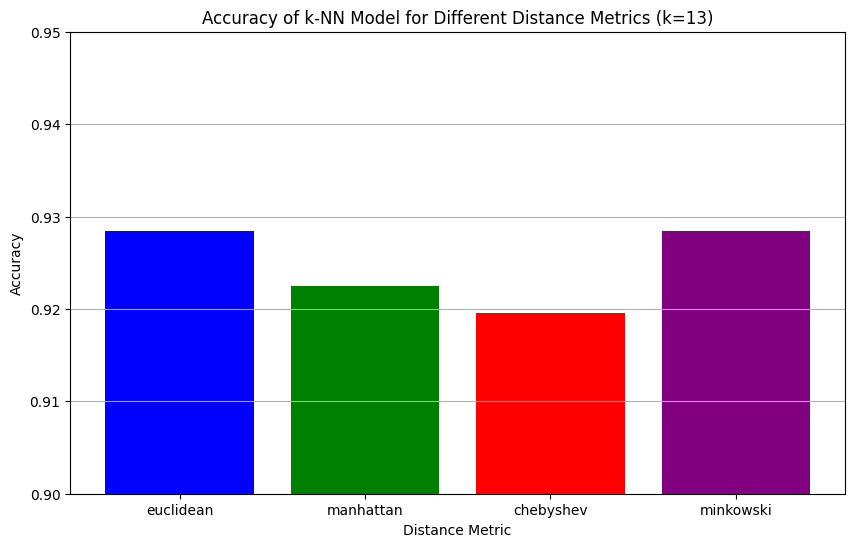

In [16]:
import matplotlib.pyplot as plt

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(distance_metrics, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.title('Accuracy of k-NN Model for Different Distance Metrics (k=13)')
plt.ylim(0.9, 0.95)  # set y-axis limits for better visualization
plt.grid(axis='y')

# Display the plot
plt.show()

- As we can see from the bar plot, distance of euclidean and minkowski lead to the best accuracy for this dataset. I'll take metric='minkowski', p=2 for kNN model training.

In [17]:
# Create an instance of KNeighborsClassifier with n_neighbors=13, metric='minkowski', p=2
kNN = KNeighborsClassifier(n_neighbors=13, metric='minkowski', p=2)

# Train the kNN model using Z-score normalized training data
kNN.fit(X_train_norm, y_train_norm)

KNeighborsClassifier(n_neighbors=13)

In [18]:
# Predict on Z-score normalized test data
y_pred_norm = kNN.predict(X_test_norm)

### 1.4 Overfitting check

In [19]:
# Predict the classes for the training data
y_train_pred = kNN.predict(X_train_norm)

# Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_train_norm, y_train_pred)
test_accuracy = accuracy_score(y_test_norm, y_pred_norm)

formatted_train_accuracy = f"Accuracy for k-Nearest Neighbour model training set is: {train_accuracy*100:.2f}%"
formatted_test_accuracy = f"Accuracy for k-Nearest Neighbour model testing set is: {test_accuracy*100:.2f}%"
print(formatted_train_accuracy)
print(formatted_test_accuracy)

Accuracy for k-Nearest Neighbour model training set is: 93.19%
Accuracy for k-Nearest Neighbour model testing set is: 92.84%


- The accuracy on the testing set (92.84%) is very close to the accuracy on the training set (93.19%), which suggests that the model is not massively overfitting.

### 1.5 Performance analysis

In [20]:
# Calculate evaluation metrics

accuracy_norm = accuracy_score(y_test_norm, y_pred_norm)
precision_norm = precision_score(y_test_norm, y_pred_norm, average='weighted')  # Using weighted average due to multiple classes
recall_norm = recall_score(y_test_norm, y_pred_norm, average='weighted')  # Using weighted average due to multiple classes
f1_norm = f1_score(y_test_norm, y_pred_norm, average='weighted')
conf_matrix_norm = confusion_matrix(y_test_norm, y_pred_norm)

In [21]:
# Refining the formatting for better clarity and structure
results_statement = (
    "Evaluation Metrics for kNN Model on Z-score Normalized Data:\n"
    + "-"*60 + "\n"
    + f"Accuracy          : {accuracy_norm * 100:.2f}%\n"
    + f"Precision (Weighted) : {precision_norm * 100:.2f}%\n"
    + f"Recall (Weighted) : {recall_norm * 100:.2f}%\n"
    + f"f1 score (Weighted) :{f1_norm * 100:.2f}%\n\n"
    + "Confusion Matrix:\n"
    + "-"*60 + "\n"
    + f"{conf_matrix_norm}"
)

print(results_statement)

Evaluation Metrics for kNN Model on Z-score Normalized Data:
------------------------------------------------------------
Accuracy          : 92.84%
Precision (Weighted) : 92.87%
Recall (Weighted) : 92.84%
f1 score (Weighted) :92.85%

Confusion Matrix:
------------------------------------------------------------
[[214   0  13   0   2   0   4]
 [  0 118   0   0   0   0   0]
 [  7   0 318   0   4   1   0]
 [  0   0   0 654   1  11  40]
 [  0   0   4   5 374   0  13]
 [  4   0   0   9   0 387  11]
 [  0   0   0  53   8   5 463]]


In [22]:
# Get the class labels
class_labels = kNN.classes_
class_labels

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

Text(0.5, 1.0, 'Confusion Matrix (Normalized by True Class) for knn model')

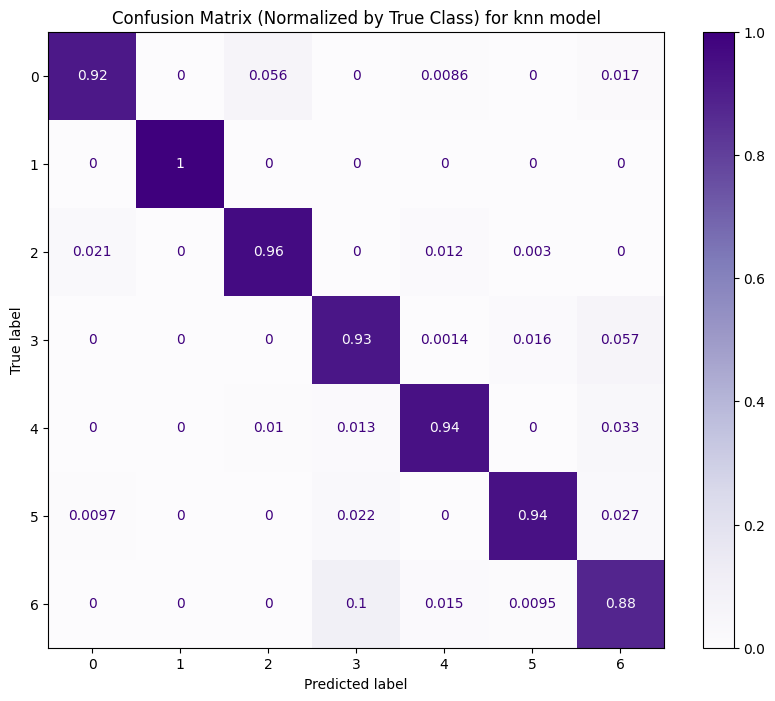

In [23]:
conf_matrix_knn_recall = confusion_matrix(y_test_norm, y_pred_norm, normalize="true")
conf_matrix_knn_precision = confusion_matrix(y_test_norm, y_pred_norm, normalize="pred")

from sklearn.metrics import ConfusionMatrixDisplay

disp_prec_knn = ConfusionMatrixDisplay(conf_matrix_knn_precision)
disp_rec_knn = ConfusionMatrixDisplay(conf_matrix_knn_recall)

fig,ax1 = plt.subplots(figsize = (10,8))
disp_rec_knn.plot(ax=ax1, cmap='Purples');
ax1.set_title("Confusion Matrix (Normalized by True Class) for knn model")

- Given the row normalization, the diagonal elements in each row represent the recall (or True Positive Rate or Sensitivity) for that class.

Text(0.5, 1.0, 'Confusion Matrix (Normalized by pred Class for knn model)')

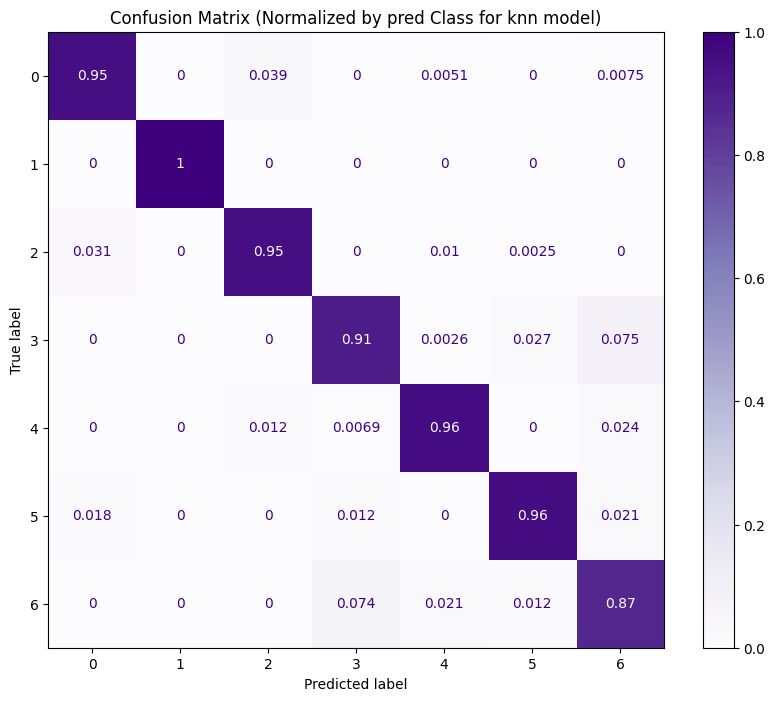

In [24]:
fig,ax2 = plt.subplots(figsize = (10,8))
disp_prec_knn.plot(ax=ax2, cmap='Purples');
ax2.set_title("Confusion Matrix (Normalized by pred Class for knn model)")

- Given the column normalization, the diagonal elements in each column represent the precision for that class.

In [25]:
from IPython.display import display

# stored matrix data
conf_matrix_data = [
    [214, 0, 13, 0, 2, 0, 4],
    [0, 118, 0, 0, 0, 0, 0],
    [7, 0, 318, 0, 4, 1, 0],
    [0, 0, 0, 654, 1, 11, 40],
    [0, 0, 4, 5, 374, 0, 13],
    [4, 0, 0, 9, 0, 387, 11],
    [0, 0, 0, 53, 8, 5, 463]
]

# Creating a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(conf_matrix_data, 
                            columns=['Pred ' + label for label in class_labels],
                            index=['Actual ' + label for label in class_labels])
confusion_df

,Pred BARBUNYA,Pred BOMBAY,Pred CALI,Pred DERMASON,Pred HOROZ,Pred SEKER,Pred SIRA
Actual BARBUNYA,214,0,13,0,2,0,4
Actual BOMBAY,0,118,0,0,0,0,0
Actual CALI,7,0,318,0,4,1,0
Actual DERMASON,0,0,0,654,1,11,40
Actual HOROZ,0,0,4,5,374,0,13
Actual SEKER,4,0,0,9,0,387,11
Actual SIRA,0,0,0,53,8,5,463


#### **Note:** It shows with minor different values after every time of running.

- Rows represent the actual classes of the test set.
- Columns represent the predicted classes by the model.

The confusion matrix for the bean classification model shows strong diagonal values, indicating a high rate of correct classifications for each bean type. 

Notably, all BOMBAY beans were perfectly classified, while some challenges were observed in distinguishing between SIRA and DERMASON beans, with 40 SIRA beans misclassified as DERMASON. 

Similarly, while BARBUNYA beans were predominantly classified accurately, there were slight misclassifications primarily with CALI and SIRA beans, amounting to 13 and 4 beans, respectively. Additionally, the CALI category demonstrated minute confusions mainly with HOROZ and BARBUNYA, leading to 4 and 7 beans being misclassified respectively.

Despite a few areas of misclassification, the matrix suggests that the model generally performs well in predicting the types of beans.

## 2. Decision Tree

In [26]:
# Display the first few rows of the dataset
dry_bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [27]:
# Split the dataset into features (X) and target variable (y)
X_dt = dry_bean_df.drop("Class", axis=1)
y_dt = dry_bean_df["Class"]

In [28]:
X_dt

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


### 2.1 Plot the different accuracies of the Decision Tree model for various training sizes

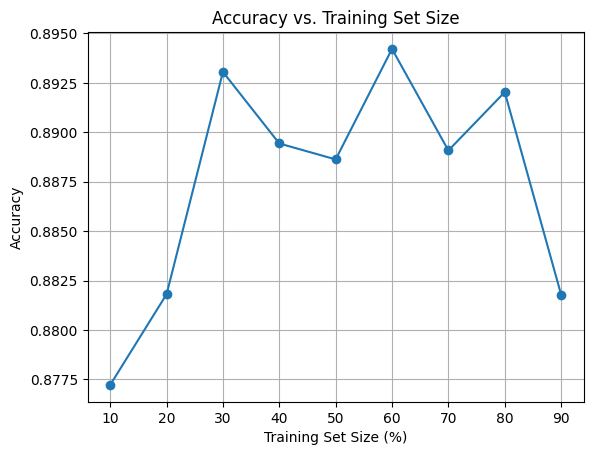

In [29]:
from sklearn.tree import DecisionTreeClassifier
accuracies = []

# Iterate over train sizes from 10% to 100% (with a gap of 10%)
for train_size in np.arange(0.1, 1.0, 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, train_size=train_size, random_state=10)
    
    # Train a model (using a simple classifier here for demonstration)
    clf_dt = DecisionTreeClassifier()
    clf_dt.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = clf_dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
train_sizes = np.arange(10, 100, 10)  

plt.plot(train_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Set Size')
plt.xticks(train_sizes)
plt.grid(True)
plt.show()

- As we can see when training set size = 60%, we get the highest accuacy. So I'll split the with test_size=0.4.

### 2.2 Decision Tree classifier

In [30]:
# Split the data into training and testing sets (60% training, 40% testing)
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.4, random_state=10)

X_train.shape, X_test.shape

((8166, 16), (5445, 16))

In [31]:
from sklearn.tree import DecisionTreeClassifier

# List of criteria to evaluate
criteria = ["gini", "entropy"]
dt_accuracies = []

# Train and evaluate the Decision Tree model for each criterion
for criterion in criteria:
    dt = DecisionTreeClassifier(criterion=criterion, random_state=10)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    dt_accuracies.append(accuracy_dt)

# Format the Decision Tree accuracies with 4 decimal places
formatted_dt_accuracies = ["{:.4f}".format(accuracy) for accuracy in dt_accuracies]

# Pair each criterion with its corresponding formatted accuracy
formatted_dt_results = list(zip(criteria, formatted_dt_accuracies))
formatted_dt_results

[('gini', '0.8949'), ('entropy', '0.8957')]

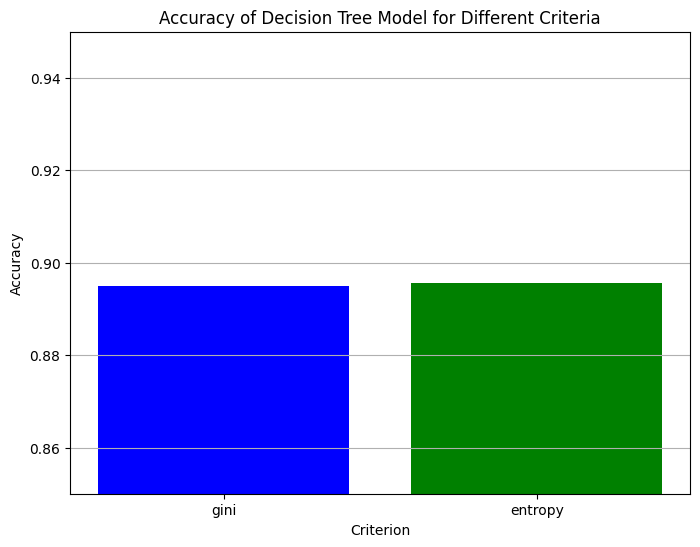

In [32]:
# Plot the accuracies for Decision Tree criteria
plt.figure(figsize=(8, 6))
plt.bar(criteria, dt_accuracies, color=['blue', 'green'])
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Accuracy of Decision Tree Model for Different Criteria')
plt.ylim(0.85, 0.95)  # set y-axis limits for better visualization
plt.grid(axis='y')

# Display the plot
plt.show()

- As we can see from the bar plot, the accuracy of Decision Tree Model is a little bit higher, so I will apply criterion='gini' for the model training.

In [33]:
# Initialize the DecisionTreeClassifier
dt_classifier_default = DecisionTreeClassifier(criterion='gini', random_state=10)

# Train the classifier on the training data
dt_classifier_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

### 2.3 Overfitting check and hyperparameter tuning

In [34]:
# Predict the classes for the training data
y_train_pred = dt_classifier_default.predict(X_train)

# Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_dt

formatted_train_accuracy = f"Accuracy for decision tree model training set is: {train_accuracy*100:.2f}%"
formatted_test_accuracy = f"Accuracy for decision tree model testing set is: {test_accuracy*100:.2f}%"
print(formatted_train_accuracy)
print(formatted_test_accuracy)

Accuracy for decision tree model training set is: 100.00%
Accuracy for decision tree model testing set is: 89.57%


In [35]:
# print out the actual number of max_depth of the model
actual_max_depth = dt_classifier_default.tree_.max_depth
print(actual_max_depth)

24


In [36]:
# Define a range of max_depth values to evaluate
max_depth_values = list(range(1, 28))
train_accuracies = []
test_accuracies = []

# Iterate through max_depth values, train the decision tree, and record accuracy
for depth in max_depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, criterion='gini', random_state=10)
    clf.fit(X_train, y_train)
    
    # Record training accuracy
    y_train_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Record testing accuracy
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

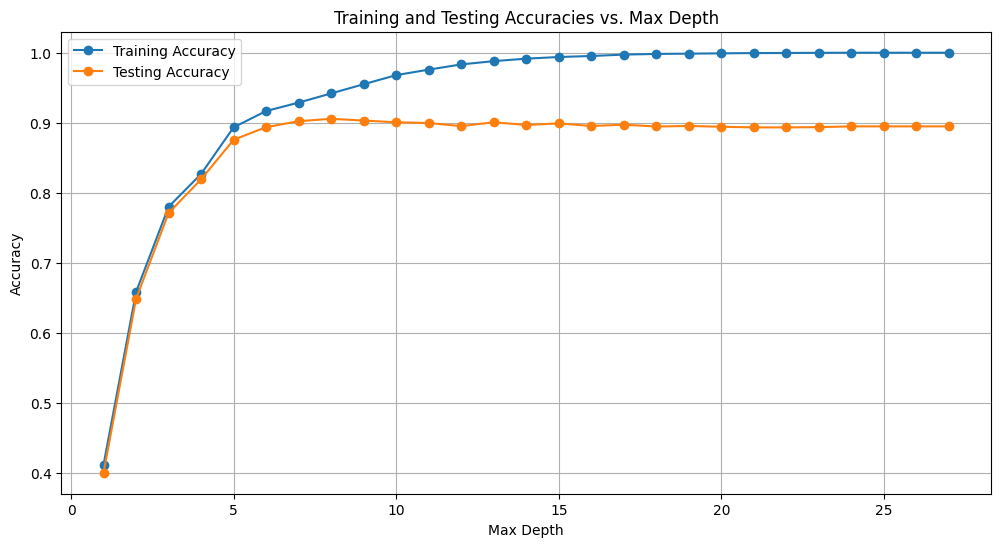

In [37]:
import matplotlib.pyplot as plt

# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(max_depth_values, test_accuracies, label="Testing Accuracy", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracies vs. Max Depth")
plt.legend()
plt.grid(True)
plt.show()

- Training accuracy keeps increasing and eventually reaches 100% as the tree depth increases. This is indicative of overfitting.

- Testing accuracy increases initially, peaks around a max_depth of 8 to 9, and then starts to slightly decrease. This suggests that a tree with a depth of around 8 to 9 provides the best generalization to unseen data. I'll take max_depth = 8 in this situation.

In [38]:
# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=8)

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

### 2.4 Performance analysis

In [39]:
# Predicting the classes for the testing data
y_pred = dt_classifier.predict(X_test)

# Calculating accuracy, precision, and recall
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred, average='weighted')
recall_dt = recall_score(y_test, y_pred, average='weighted')
f1_dt = f1_score(y_test, y_pred, average='weighted')
conf_matrix_dt = confusion_matrix(y_test, y_pred)

In [40]:
# Refining the formatting for better clarity and structure
results_statement = (
    "Evaluation Metrics for Decision Tree Model:\n"
    + "-"*60 + "\n"
    + f"Accuracy          : {accuracy_dt * 100:.2f}%\n"
    + f"Precision (Weighted) : {precision_dt * 100:.2f}%\n"
    + f"Recall (Weighted) : {recall_dt * 100:.2f}%\n"
    + f"f1 score (Weighted) :{f1_norm * 100:.2f}%\n\n"
    + "Confusion Matrix:\n"
    + "-"*60 + "\n"
    + f"{conf_matrix_dt}"
)

print(results_statement)

Evaluation Metrics for Decision Tree Model:
------------------------------------------------------------
Accuracy          : 90.71%
Precision (Weighted) : 90.74%
Recall (Weighted) : 90.71%
f1 score (Weighted) :92.85%

Confusion Matrix:
------------------------------------------------------------
[[ 454    0   36    0    5    0   15]
 [   0  223    2    0    0    0    0]
 [  36    0  610    0   12    2    2]
 [   0    0    0 1268    1   25   85]
 [   5    0   20   13  713    0   19]
 [   7    0    0   30    0  779   19]
 [   1    0    7  126   18   20  892]]


Text(0.5, 1.0, 'Confusion Matrix (Normalized by True Class) for decision tree model')

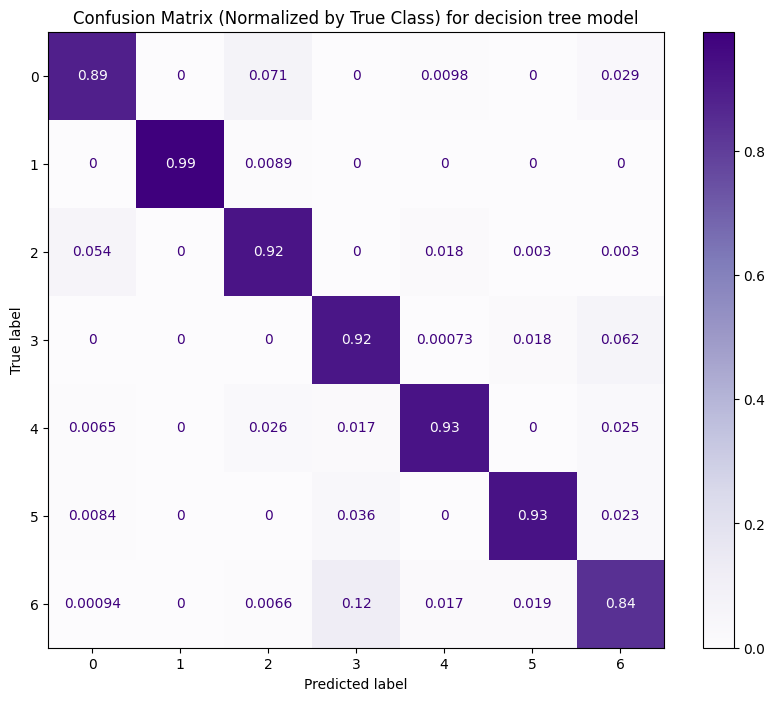

In [41]:
conf_matrix_dt_recall = confusion_matrix(y_test, y_pred, normalize="true")
conf_matrix_dt_precision = confusion_matrix(y_test, y_pred, normalize="pred")

from sklearn.metrics import ConfusionMatrixDisplay

disp_prec_dt = ConfusionMatrixDisplay(conf_matrix_dt_precision)
disp_rec_dt = ConfusionMatrixDisplay(conf_matrix_dt_recall)

fig,ax1 = plt.subplots(figsize = (10,8))
disp_rec_dt.plot(ax=ax1, cmap='Purples');
ax1.set_title("Confusion Matrix (Normalized by True Class) for decision tree model")

- Given the row normalization, the diagonal elements in each row represent the recall (or True Positive Rate or Sensitivity) for that class.

Text(0.5, 1.0, 'Confusion Matrix (Normalized by pred Class) for decision tree model')

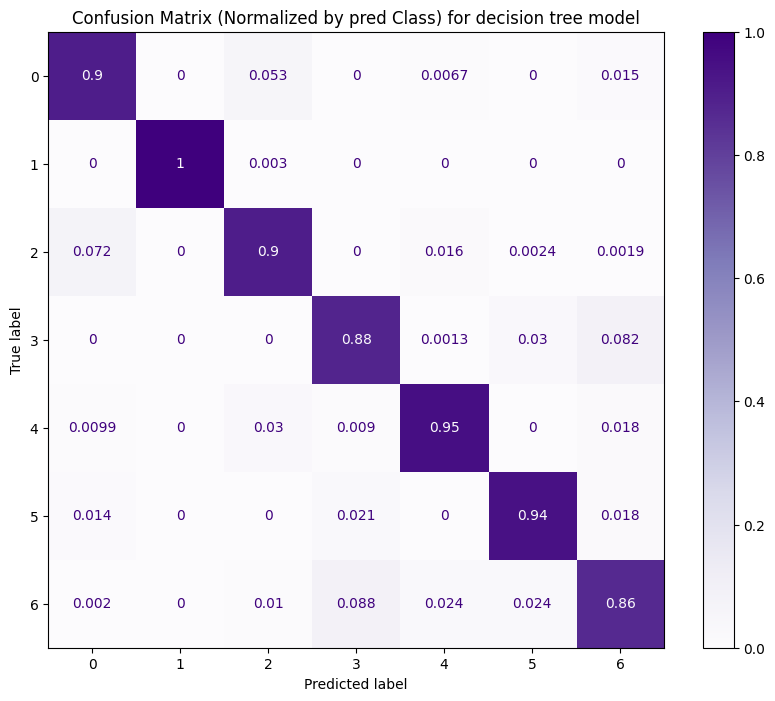

In [42]:
fig,ax2 = plt.subplots(figsize = (10,8))
disp_prec_dt.plot(ax=ax2, cmap='Purples');
ax2.set_title("Confusion Matrix (Normalized by pred Class) for decision tree model")

- Given the column normalization, the diagonal elements in each column represent the precision for that class.

In [43]:
from IPython.display import display

# stored matrix data
conf_matrix_data = [
    [453, 0, 36, 0, 6, 0, 15],
    [1, 222, 2, 0, 0, 0, 0],
    [35, 0, 610, 0, 13, 2, 2],
    [0, 0, 0, 1263, 0, 25, 91],
    [4, 0, 22, 15, 709, 0, 20],
    [6, 0, 0, 30, 0, 778, 21],
    [2, 0, 7, 127, 18, 19, 891]
]

# Creating a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(conf_matrix_data, 
                            columns=['Pred ' + label for label in class_labels],
                            index=['Actual ' + label for label in class_labels])
confusion_df

,Pred BARBUNYA,Pred BOMBAY,Pred CALI,Pred DERMASON,Pred HOROZ,Pred SEKER,Pred SIRA
Actual BARBUNYA,453,0,36,0,6,0,15
Actual BOMBAY,1,222,2,0,0,0,0
Actual CALI,35,0,610,0,13,2,2
Actual DERMASON,0,0,0,1263,0,25,91
Actual HOROZ,4,0,22,15,709,0,20
Actual SEKER,6,0,0,30,0,778,21
Actual SIRA,2,0,7,127,18,19,891


#### **Note:** It shows with minor different values after every time of running.

- Rows represent the actual classes of the test set.
- Columns represent the predicted classes by the model.

The confusion matrix sheds light on the performance of the bean classification model, with prominent diagonal figures emphasizing the model's efficiency in accurate categorization for each bean variety.

In particular, BARBUNYA beans experienced some confusion with CALI, HOROZ and SEKER, with 36, 6 and 15 beans respectively being misclassified. CALI, on the other hand, had minor confusions primarily with HOROZ and BARBUNYA, leading to 13 and 35 misclassifications, respectively.

Though certain varieties like DERMASON and HOROZ faced misidentifications with SIRA beans, it's commendable that BOMBAY beans were distinctly and accurately identified. All in all, the matrix demonstrates that the model, despite a few missteps, possesses a commendable capability in differentiating between bean types.

## 3. Logistic Regression

### 3.1 Plot the different accuracies of the Logistic Regression model for various training sizes

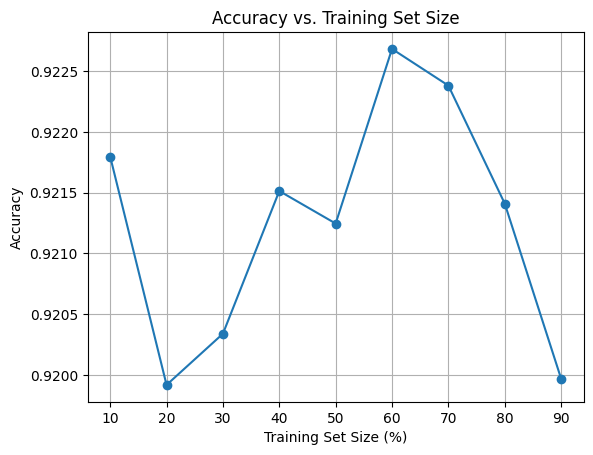

In [44]:
from sklearn.linear_model import LogisticRegression
accuracies = []

# Iterate over train sizes from 10% to 100% (with a gap of 10%)
for train_size in np.arange(0.1, 1.0, 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, train_size=train_size, random_state=10)
    
    # Train a model (using a simple classifier here for demonstration)
    clf_lr = LogisticRegression(random_state=10, max_iter=300)
    clf_lr.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = clf_lr.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
train_sizes = np.arange(10, 100, 10)  

plt.plot(train_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Set Size')
plt.xticks(train_sizes)
plt.grid(True)
plt.show();

- As we can see when training set size = 70%, we get the highest accuacy. So I'll split the with test_size=0.3.

In [45]:
# Splitting the dataset into training and test sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_normalized, y_normalized, test_size=0.3, random_state=10)

### 3.2 Logistic Regression classifier

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Initialize the Logistic Regression model
logreg_test = LogisticRegression(random_state=10, max_iter=300)

# Train the model on the training data
logreg_test.fit(X_train_lr, y_train_lr)

# Predict the classes for the testing data
y_pred_logreg = logreg_test.predict(X_test_lr)

### 3.3 Overfitting check

In [47]:
# Predict the classes for the training data
y_train_pred = logreg_test.predict(X_train_lr)

# Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_train_lr, y_train_pred)
test_accuracy = accuracy_score(y_test_lr, y_pred_logreg)

formatted_train_accuracy = f"Accuracy for logistic regression model training set is: {train_accuracy*100:.2f}%"
formatted_test_accuracy = f"Accuracy for logistic regression model testing set is: {test_accuracy*100:.2f}%"
print(formatted_train_accuracy)
print(formatted_test_accuracy)

Accuracy for logistic regression model training set is: 92.54%
Accuracy for logistic regression model testing set is: 92.24%


- In this case, the training and testing accuracies are quite close (92.56% vs. 92.10%), which suggests that the model is not massively overfitting.

### 3.4 Performance analysis

In [48]:
# Calculate accuracy, precision, and recall for the Logistic Regression model
accuracy_logreg = accuracy_score(y_test_lr, y_pred_logreg)
precision_logreg = precision_score(y_test_lr, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test_lr, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test_lr, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test_lr, y_pred_logreg)

In [49]:
# Refining the formatting for better clarity and structure
results_statement = (
    "Evaluation Metrics for Logistic Regression Model:\n"
    + "-"*60 + "\n"
    + f"Accuracy          : {accuracy_logreg * 100:.2f}%\n"
    + f"Precision (Weighted) : {precision_logreg * 100:.2f}%\n"
    + f"Recall (Weighted) : {recall_logreg * 100:.2f}%\n"
    + f"f1 score (Weighted) : {f1_logreg * 100:.2f}%\n\n"
    + "Confusion Matrix:\n"
    + "-"*60 + "\n"
    + f"{conf_matrix_logreg}"
)

print(results_statement)

Evaluation Metrics for Logistic Regression Model:
------------------------------------------------------------
Accuracy          : 92.24%
Precision (Weighted) : 92.35%
Recall (Weighted) : 92.24%
f1 score (Weighted) : 92.27%

Confusion Matrix:
------------------------------------------------------------
[[324   0  17   0   2   2  16]
 [  0 186   0   0   0   0   0]
 [ 13   0 475   0  11   1   3]
 [  0   0   0 957   2  12  82]
 [  0   0   9   9 537   0  14]
 [ 10   0   0   9   0 588  18]
 [  0   0   1  62  15   9 700]]


Text(0.5, 1.0, 'Confusion Matrix (Normalized by True Class) for logistic regression model')

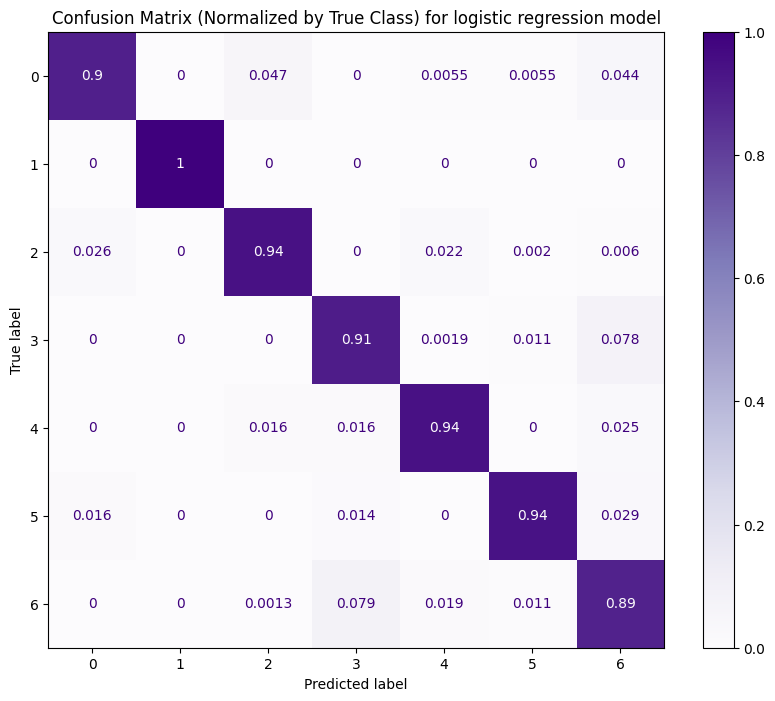

In [50]:
conf_matrix_lr_recall = confusion_matrix(y_test_lr, y_pred_logreg, normalize="true")
conf_matrix_lr_precision = confusion_matrix(y_test_lr, y_pred_logreg, normalize="pred")

from sklearn.metrics import ConfusionMatrixDisplay

disp_prec_lr = ConfusionMatrixDisplay(conf_matrix_lr_precision)
disp_rec_lr = ConfusionMatrixDisplay(conf_matrix_lr_recall)

fig,ax1 = plt.subplots(figsize = (10,8))
disp_rec_lr.plot(ax=ax1, cmap='Purples');
ax1.set_title("Confusion Matrix (Normalized by True Class) for logistic regression model")

- Given the row normalization, the diagonal elements in each row represent the recall (or True Positive Rate or Sensitivity) for that class

Text(0.5, 1.0, 'Confusion Matrix (Normalized by pred Class) for logistic regression model')

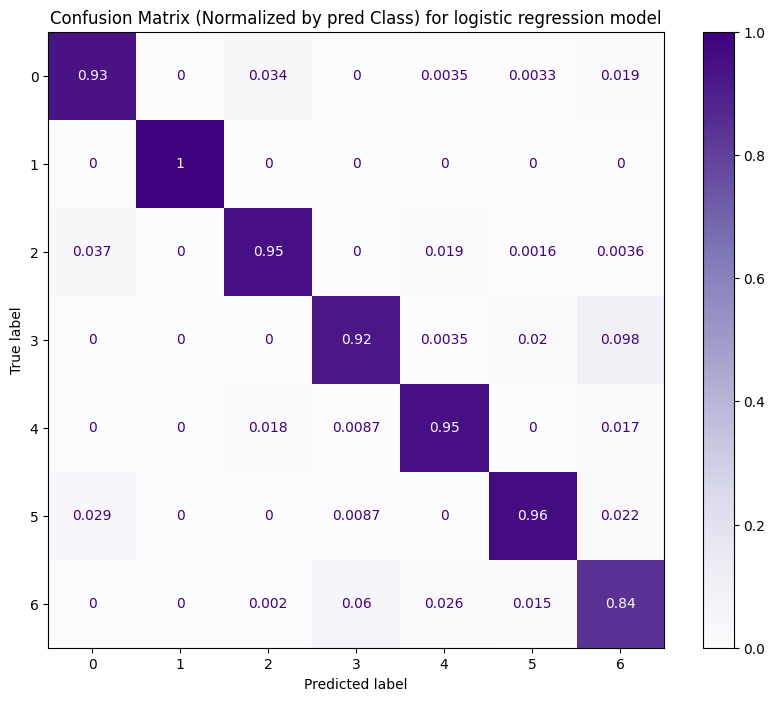

In [51]:
fig,ax2 = plt.subplots(figsize = (10,8))
disp_prec_lr.plot(ax=ax2, cmap='Purples');
ax2.set_title("Confusion Matrix (Normalized by pred Class) for logistic regression model")

- Given the column normalization, the diagonal elements in each column represent the precision for that class

In [52]:
# stored matrix data
conf_matrix_data = [
    [324, 0, 17, 0, 2, 2, 16],
    [0, 186, 0, 0, 0, 0, 0],
    [13, 0, 475, 0, 11, 1, 3],
    [0, 0, 0, 959, 2, 11, 81],
    [0, 0, 9, 9, 537, 0, 14],
    [10, 0, 0, 9, 0, 588, 18],
    [0, 0, 1, 61, 15, 9, 701]
]

# Creating a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(conf_matrix_data, 
                            columns=['Pred ' + label for label in class_labels],
                            index=['Actual ' + label for label in class_labels])
confusion_df

,Pred BARBUNYA,Pred BOMBAY,Pred CALI,Pred DERMASON,Pred HOROZ,Pred SEKER,Pred SIRA
Actual BARBUNYA,324,0,17,0,2,2,16
Actual BOMBAY,0,186,0,0,0,0,0
Actual CALI,13,0,475,0,11,1,3
Actual DERMASON,0,0,0,959,2,11,81
Actual HOROZ,0,0,9,9,537,0,14
Actual SEKER,10,0,0,9,0,588,18
Actual SIRA,0,0,1,61,15,9,701


#### **Note:** It shows with minor different values after every time of running.

- Rows represent the actual classes of the test set.
- Columns represent the predicted classes by the model.

Significantly, the BOMBAY beans were impeccably classified with no misidentifications, showcasing the model's strength in recognizing this particular type. DERMASON beans are mostly classified accurately (959 beans). Still, there's a notable challenge in distinguishing them from SIRA beans, with 61 beans being misclassified as DERMASON.

BARBUNYA beans are predominantly classified correctly with 324 true positives. However, there are slight misclassifications with CALI (9 beans) and SEKER (14 beans). Similarly, the HOROZ category demonstrated some challenges in differentiating from CALI and SIRA, causing 6 and 9 beans to be misclassified, respectively. SEKER beans, while majorly accurate with 537 true positives, face minor misclassifications with SIRA (14 beans) and DERMASON (9 beans). SIRA beans have largely predictions at 710 beans. However, there's a clear challenge in differentiating them from DERMASON 61 beans).

The notable challenge lies in distinguishing DERMASON from SIRA beans, suggesting that this area might benefit from further model refinement.

## 4. Random Forest

In [53]:
# Split the dataset into features (X) and target variable (y)
X_rf = dry_bean_df.drop("Class", axis=1)
y_rf = dry_bean_df["Class"]

### 4.1 Plot the different accuracies of the Random Forest model for various training sizes

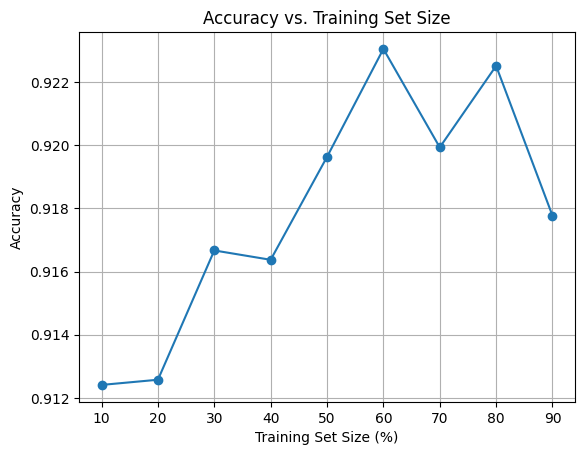

In [54]:
from sklearn.ensemble import RandomForestClassifier
accuracies = []

# Iterate over train sizes from 10% to 100% (with a gap of 10%)
for train_size in np.arange(0.1, 1.0, 0.1):
    X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, train_size=train_size, random_state=10)
    
    # Train a model (using a simple classifier here for demonstration)
    clf_rf = RandomForestClassifier(random_state=10)
    clf_rf.fit(X_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = clf_rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
train_sizes = np.arange(10, 100, 10)  

plt.plot(train_sizes, accuracies, marker='o', linestyle='-')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Training Set Size')
plt.xticks(train_sizes)
plt.grid(True)
plt.show()

- As we can see when training set size = 60%, we get the highest accuacy. So I'll split the with test_size=0.4.

### 4.2 Random Forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Splitting the dataset into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.4, random_state=10)

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train_rf, y_train_rf)

# Predict on the testing set
y_test_pred = rf_clf.predict(X_test_rf)

### 4.3 Overfitting check and hyperparameter tuning

In [56]:
# Predict the classes for the training data
y_train_pred = rf_clf.predict(X_train_rf)

# Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_train_rf, y_train_pred)
test_accuracy = accuracy_score(y_test_rf, y_test_pred)

formatted_train_accuracy = f"Accuracy for random forest model training set is: {train_accuracy*100:.2f}%"
formatted_test_accuracy = f"Accuracy for random forest model testing set is: {test_accuracy*100:.2f}%"
print(formatted_train_accuracy)
print(formatted_test_accuracy)

Accuracy for random forest model training set is: 100.00%
Accuracy for random forest model testing set is: 92.30%


- The Random Forest model's training accuracy is nearly 100%, but there's a noticeable gap between training and testing accuracy, indicating potential overfitting.

In [57]:
# Define a range of max_depth values to evaluate
max_depth_values = list(range(1, 31))
train_accuracies = []
test_accuracies = []

# Iterate through max_depth values, train the decision tree, and record accuracy
for depth in max_depth_values:
    rf_test = RandomForestClassifier(max_depth=depth, random_state=10)
    rf_test.fit(X_train_rf, y_train_rf)
    
    # Record training accuracy
    y_train_pred = rf_test.predict(X_train_rf)
    train_accuracy = accuracy_score(y_train_rf, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Record testing accuracy
    y_test_pred = rf_test.predict(X_test_rf)
    test_accuracy = accuracy_score(y_test_rf, y_test_pred)
    test_accuracies.append(test_accuracy)

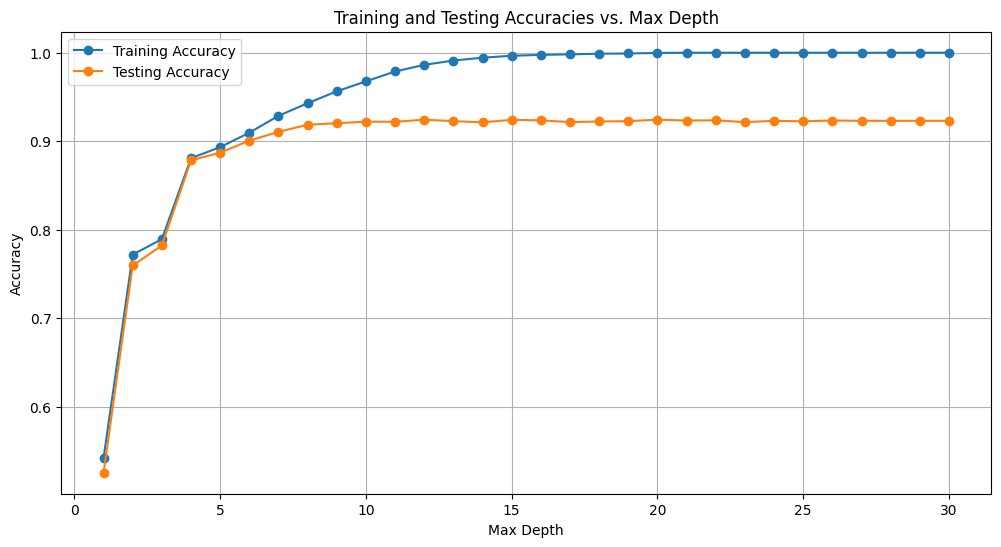

In [58]:
# Plotting the accuracies
plt.figure(figsize=(12, 6))
plt.plot(max_depth_values, train_accuracies, label="Training Accuracy", marker='o')
plt.plot(max_depth_values, test_accuracies, label="Testing Accuracy", marker='o')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracies vs. Max Depth")
plt.legend()
plt.grid(True)
plt.show()

In [59]:
# Retrain the model after tuning
# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=10, max_depth = 8)
rf.fit(X_train_rf, y_train_rf)

# Predict on the testing set
y_pred_rf = rf.predict(X_test_rf)

### 4.4 Performance Analysis

In [60]:
# Predict the classes for the training data
y_train_pred = rf.predict(X_train_rf)

# Calculate accuracy for both training and testing data
train_accuracy = accuracy_score(y_train_rf, y_train_pred)
test_accuracy = accuracy_score(y_test_rf, y_pred_rf)

formatted_train_accuracy = f"Accuracy for random forest model training set is: {train_accuracy*100:.2f}%"
formatted_test_accuracy = f"Accuracy for random forest model testing set is: {test_accuracy*100:.2f}%"
print(formatted_train_accuracy)
print(formatted_test_accuracy)

Accuracy for random forest model training set is: 94.29%
Accuracy for random forest model testing set is: 91.86%


- After tuning, the training accuracy has decreased to 94.29%, which is closer to the test accuracy of 91.86%. This suggests that the tuning reduced overfitting.

In [61]:
# Calculate accuracy, precision, and recall for the Logistic Regression model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_rf, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_rf, y_pred_rf, average='weighted')
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

Evaluation Metrics for Random Forest Model:
------------------------------------------------------------
Accuracy          : 91.86%
Precision (Weighted) : 91.92%
Recall (Weighted) : 91.86%
f1 score (Weighted) : 92.27%

Confusion Matrix:
------------------------------------------------------------
[[ 452    0   32    0    2    3   21]
 [   1  224    0    0    0    0    0]
 [  35    0  612    0   10    2    3]
 [   0    0    0 1284    1   19   75]
 [   1    0   16   10  719    0   24]
 [   4    0    0   20    0  788   23]
 [   0    0    2  114   15   10  923]]


Text(0.5, 1.0, 'Confusion Matrix (Normalized by True Class) for random forest model')

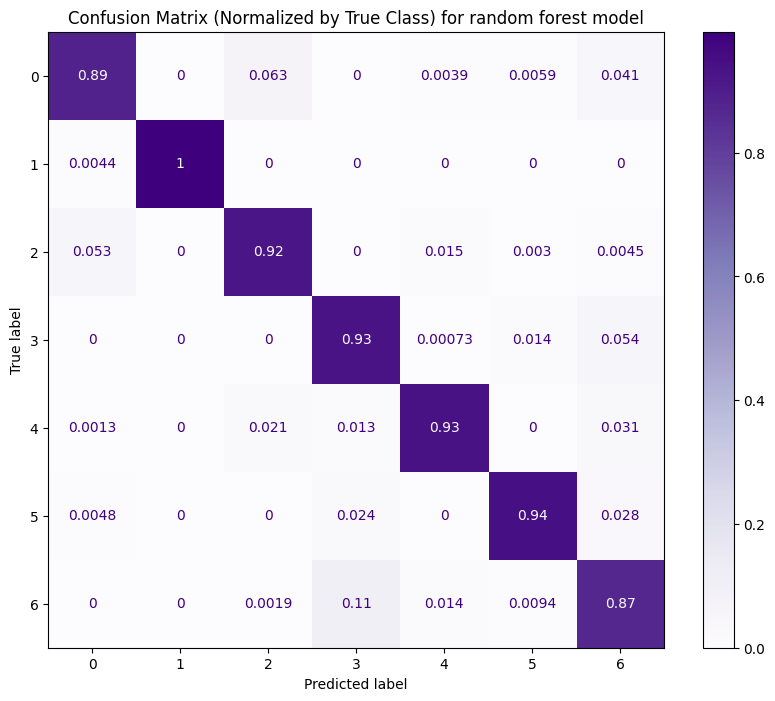

In [62]:
results_statement = (
    "Evaluation Metrics for Random Forest Model:\n"
    + "-"*60 + "\n"
    + f"Accuracy          : {accuracy_rf * 100:.2f}%\n"
    + f"Precision (Weighted) : {precision_rf * 100:.2f}%\n"
    + f"Recall (Weighted) : {recall_rf * 100:.2f}%\n"
    + f"f1 score (Weighted) : {f1_logreg * 100:.2f}%\n\n"
    + "Confusion Matrix:\n"
    + "-"*60 + "\n"
    + f"{conf_matrix_rf}"
)

print(results_statement)

conf_matrix_rf_recall = confusion_matrix(y_test_rf, y_pred_rf, normalize="true")
conf_matrix_rf_precision = confusion_matrix(y_test_rf, y_pred_rf, normalize="pred")

from sklearn.metrics import ConfusionMatrixDisplay

disp_prec_rf = ConfusionMatrixDisplay(conf_matrix_rf_precision)
disp_rec_rf = ConfusionMatrixDisplay(conf_matrix_rf_recall)

fig,ax1 = plt.subplots(figsize = (10,8))
disp_rec_rf.plot(ax=ax1, cmap='Purples');
ax1.set_title("Confusion Matrix (Normalized by True Class) for random forest model")

- Given the row normalization, the diagonal elements in each row represent the recall (or True Positive Rate) for that class

Text(0.5, 1.0, 'Confusion Matrix (Normalized by pred Class) for random forest model')

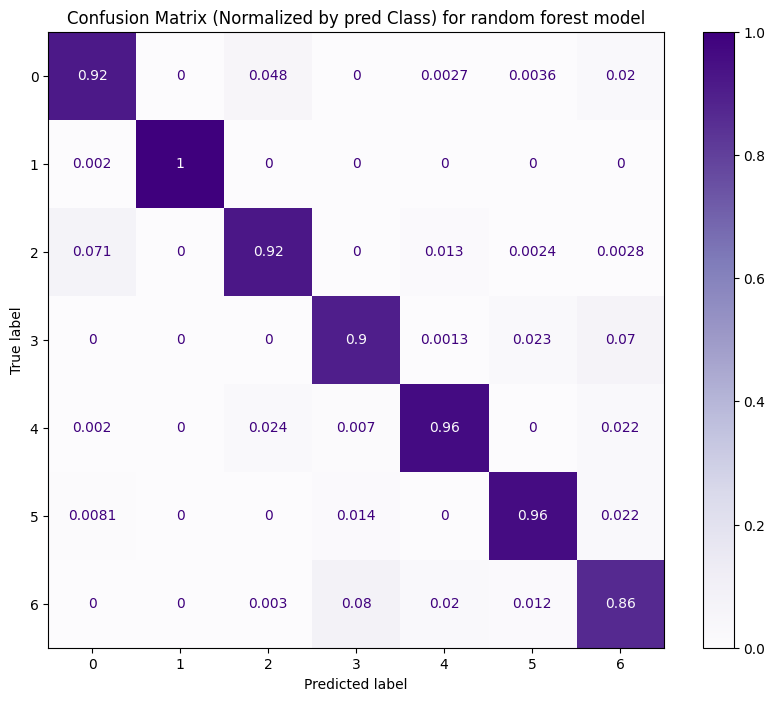

In [63]:
fig,ax2 = plt.subplots(figsize = (10,8))
disp_prec_rf.plot(ax=ax2, cmap='Purples');
ax2.set_title("Confusion Matrix (Normalized by pred Class) for random forest model")

- Given the column normalization, the diagonal elements in each column represent the precision for that class.

In [64]:
# stored matrix data
conf_matrix_data = [
    [452, 0, 32, 0, 2, 3, 21],
    [1, 224, 0, 0, 0, 0, 0],
    [35, 0, 612, 0, 10, 2, 3],
    [0, 0, 0, 1284, 1, 19, 75],
    [1, 0, 16, 10, 719, 0, 24],
    [4, 0, 0, 20, 0, 788, 23],
    [0, 0, 2, 114, 15, 10, 923]
]

# Creating a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(conf_matrix_data, 
                            columns=['Pred ' + label for label in class_labels],
                            index=['Actual ' + label for label in class_labels])
confusion_df

,Pred BARBUNYA,Pred BOMBAY,Pred CALI,Pred DERMASON,Pred HOROZ,Pred SEKER,Pred SIRA
Actual BARBUNYA,452,0,32,0,2,3,21
Actual BOMBAY,1,224,0,0,0,0,0
Actual CALI,35,0,612,0,10,2,3
Actual DERMASON,0,0,0,1284,1,19,75
Actual HOROZ,1,0,16,10,719,0,24
Actual SEKER,4,0,0,20,0,788,23
Actual SIRA,0,0,2,114,15,10,923


#### **Note:** It shows with minor different values after every time of running.

- Rows represent the actual classes of the test set.
- Columns represent the predicted classes by the model.

The confusion matrix for the Random Forest model highlights its efficacy in classifying different bean classes. "BOMBAY" stands out with impeccable classification, having 224 correct predictions and only 1 misclassification. However, DERMASON beans see a challenge in differentiating from the SIRA category, with 75 beans being incorrectly classified as SIRA, pinpointing an area for potential improvement.

For BARBUNYA beans, while the majority were correctly identified (452 beans), there were misclassifications with CALI (32 beans) and minor confusions with other categories like HOROZ and SIRA. The CALI category, in turn, experienced misclassifications mainly with HOROZ and BARBUNYA.

"HOROZ" and "SEKER" have minor misclassifications but generally perform well.

## 5. Result Discussion

### 5.1 Visulization of performance metrics of these 4 models

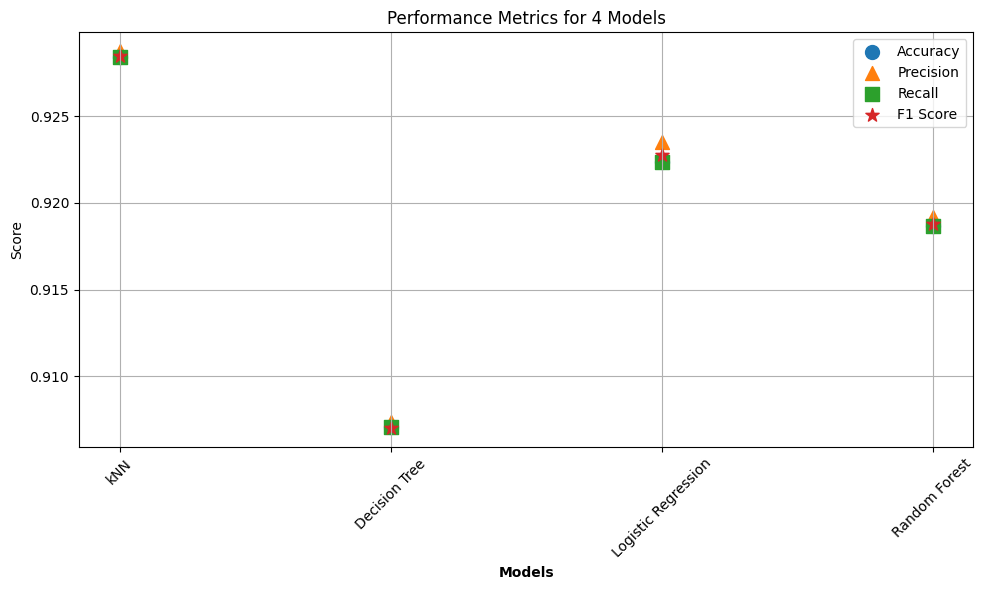

In [65]:
# Sample data
models = ['kNN', 'Decision Tree', 'Logistic Regression', 'Random Forest']
accuracy = [accuracy_norm, accuracy_dt, accuracy_logreg, accuracy_rf]
precision = [precision_norm, precision_dt, precision_logreg, precision_rf]
recall = [recall_norm, recall_dt, recall_logreg, recall_rf]
f1 = [f1_norm, f1_dt, f1_logreg, f1_rf]

# Create a scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(models, accuracy, label='Accuracy', marker='o', s=100)
plt.scatter(models, precision, label='Precision', marker='^', s=100)
plt.scatter(models, recall, label='Recall', marker='s', s=100)
plt.scatter(models, f1, label='F1 Score', marker='*', s=100)

# Format plot
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score')
plt.title('Performance Metrics for 4 Models')
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

- All these four models perform relatively well, with accuracy, precision, recall, and F1 scores all being above 90% for most cases. 

- But kNN seems to be the top performer for this dataset, based on the provided metrics which followed by logistic regression model. 

- The Decision Tree model has the lowest metrics across the board. However, the differences between the models are not drastic. The values of accuracy, precision, recall, and F1 score are all very close to each other for a given model.

- When these 4 performance metrics value are closely aligned, it typically indicates a balanced dataset and consistent model performance across both positive and negative classes. The model is likely making correct predictions for both classes at similar rates, with few false positives and false negatives. This convergence of metrics suggests the model doesn't exhibit extreme behaviors, such as predicting only one class, and is performing well across all facets of classification.

### 5.2 Disscusion the result

For a dataset with C classes (here is C=7):

1. Accuracy:

$ \text{Accuracy} = \frac{1}{N} \sum_{i=1}^{C} \text{True Positives for class } i $

When accuracy closely aligns with precision and recall, it indicates that the model is consistently and accurately classifying instances across all classes, with minimal false positives and false negatives. Essentially, the model's ability to correctly predict both positive and negative classes, combined with a low rate of misclassifications, results in all these metrics converging to similar values.

2. Precision for Class i:

$ \text{Precision}_i = \frac{\text{True Positives for class } i}{\sum_{i=1}^{C} (\text{True Positives for class } i + \text{False Positives for class } i)} 
$

Precision for a class is high when the number of correct positive predictions for that class (True Positives) is high and the number of incorrect positive predictions (False Positives) is low. If precision values for all classes are similar, it means the model is consistently predicting positive instances for each class with a similar rate of correctness.

3. Recall for class i:

$ \text{Recall}_i = \frac{\text{True Positives for class } i}{\sum_{i=1}^{C} (\text{True Positives for class } i + \text{False Negatives for class } i)} $

Recall is high when the model correctly identifies most of the positive instances for that class and misses very few (low False Negatives). If recall values are similar across all classes, it indicates that the model is consistently identifying positive instances for each class and not missing many.

4. F1 score for class i:

$ \text{F1 Score}_i = 2 \times \frac{\text{Precision}_i \times \text{Recall}_i}{\text{Precision}_i + \text{Recall}_i} $

The F1 score is the harmonic mean of precision and recall. If both precision and recall are similar across classes, their harmonic mean (F1 score) will also be closely aligned for all classes.

# Task 2:
Imagine that one of the bean types (‘Sira’) is moderately poisonous. How should you ‘nudge’ the performance of a classifier to address this? What evaluation metric is appropriate to capture this? Starting with the research resources linked below, identify a method to address this issue; test this method on the dataset. You don’t need to get perfect accuracy on the ‘Sira’ classification, the objective is to improve performance on the ‘Sira’ class without too much impact on the other classes. Discuss your findings in markdown. 

## 2.1 Understand the question

- If the 'Sira' bean type is moderately poisonous, our primary concern would be to minimize the number of times we incorrectly classify a bean as not being 'Sira' when it actually is (False Negatives for the 'Sira' class). This is because misclassifying a poisonous bean as non-poisonous can have adverse health consequences.

- One way to "nudge" a classifier like the **RandomForestClassifier** to be more sensitive to a particular class is to use the **class_weight** parameter. By assigning a higher weight to the 'Sira' class, we can make the classifier more sensitive to that class, potentially reducing the number of False Negatives.

- The most direct metric that captures False Negatives is Recall. Recall is defined as:


$ \text{Recall}_i = \frac{\text{True Positives for class } i}{\sum_{i=1}^{C} (\text{True Positives for class } i + \text{False Negatives for class } i)} $

A high recall for the 'Sira' class would mean that we are correctly identifying most of the actual 'Sira' beans and minimizing the chances of incorrectly classifying a poisonous bean as non-poisonous.

## 2.2 Implementing the Solution

In [66]:
# Check the distribution of bean types in the "Class" column
bean_class_distribution = dry_bean_df['Class'].value_counts()

bean_class_distribution

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

- The dataset contains several bean types, with 'Sira' having 2,636 instances. Given that 'Sira' is moderately poisonous, our focus will be on achieving a high recall for this class.

#### Let's take a look of the performance metrics we got from these 4 models

In [67]:
# Create a dataframe
data = {
    "Model": ["KNN", "Decision Tree", "Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_norm, accuracy_dt, accuracy_logreg, accuracy_rf],
    "Precision": [precision_norm, precision_dt, precision_logreg, precision_rf],
    "Recall": [recall_norm, recall_dt, recall_logreg, recall_rf],
    "F1-Score": [f1_norm, f1_dt, f1_logreg, f1_rf]
}

df = pd.DataFrame(data)
df[['Accuracy', 'Precision', 'Recall', 'F1-Score']] = (df[['Accuracy', 'Precision', 'Recall', 'F1-Score']] * 100).round(2).astype(str) + "%"
df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,92.84%,92.87%,92.84%,92.85%
1,Decision Tree,90.71%,90.74%,90.71%,90.7%
2,Logistic Regression,92.24%,92.35%,92.24%,92.27%
3,Random Forest,91.86%,91.92%,91.86%,91.88%


- The **RandomForestClassifier** without any class weight adjustments achieved a recall of approximately (91.41%) for the 'Sira' class.

- Using the **class_weight** parameter in the Random Forest classifier offers a strategic way to address class imbalances and prioritize specific classes. It helps in mitigating biases, especially in datasets with uneven class distributions or when certain classes have higher significance, like identifying poisonous beans. This flexibility avoids the need for data resampling and harnesses the robustness of Random Forest, enhancing performance where it matters most. 

- Next, we'll adjust the **class_weight** parameter to give more weight to the "Sira" class and then train and evaluate the **RandomForestClassifier** to see if we can improve this recall. 

#### We firstly adjust **class_weight** for "Sira" as double. This means the "Sira" class will be given even more importance during training. This can be useful, especially if misclassifying "Sira" beans has a significant cost or consequence, as in the case where "Sira" beans are moderately poisonous.

In [68]:
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


# Encode the categorical labels
label_encoder = LabelEncoder()
dry_bean_df['Class_encoded'] = label_encoder.fit_transform(dry_bean_df['Class'])

# Compute the inverse of class frequencies as class weights
class_weights = len(y_train_rf) / (y_train_rf.nunique() * y_train_rf.value_counts())

# Convert class weights to a dictionary format suitable for RandomForest
class_weight_dict = class_weights.to_dict()

# Assign more weight to the "Sira" class using its name directly
class_weight_dict['SIRA'] = class_weight_dict['SIRA'] * 2  # Doubling the weight

# Train a RandomForestClassifier with class_weight adjustment
clf_weighted = RandomForestClassifier(class_weight=class_weight_dict, max_depth = 8, random_state=10)
clf_weighted.fit(X_train_rf, y_train_rf)

# Predict on the test set
y_pred_weighted = clf_weighted.predict(X_test_rf)

# Evaluate recall for the "Sira" class
classification_report_weighted = classification_report(y_test_rf, y_pred_weighted, target_names=label_encoder.classes_, output_dict=True)
recall_sira_weighted = classification_report_weighted['SIRA']['recall']

recall_sira_weighted

0.9398496240601504

#### Visualisaze to see how adjusting the weight for the "Sira" class impacts its recall.

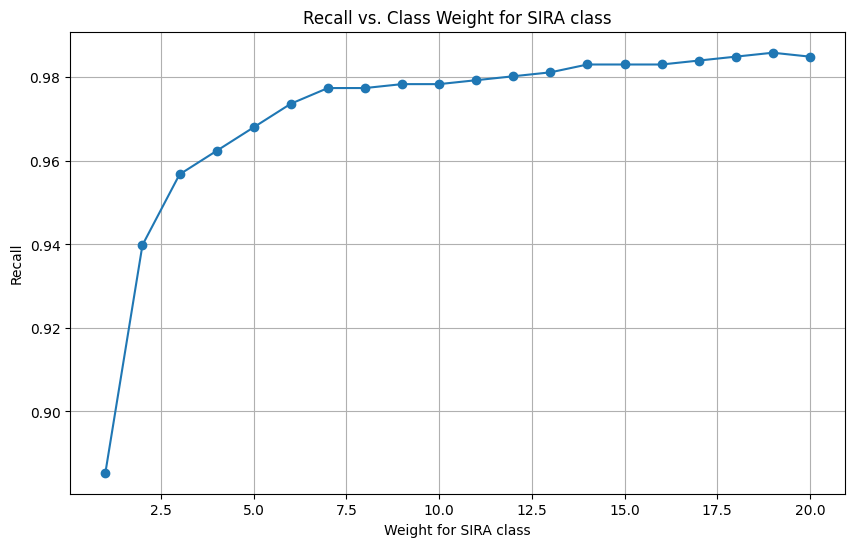

In [69]:
recall_values = []
weights_range_updated = list(range(1, 21))

for weight in weights_range_updated:
    # Adjust the class weight for the "Sira" class
    class_weight_dict['SIRA'] = class_weights['SIRA'] * weight

    # Train a RandomForestClassifier with the adjusted class_weight
    clf_weighted = RandomForestClassifier(class_weight=class_weight_dict, max_depth = 8, random_state=10)
    clf_weighted.fit(X_train_rf, y_train_rf)
    
    # Predict on the test set
    y_pred_weighted = clf_weighted.predict(X_test_rf)
    
    # Compute recall for the "Sira" class
    report = classification_report(y_test_rf, y_pred_weighted, target_names=label_encoder.classes_, output_dict=True)
    recall_values.append(report['SIRA']['recall'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weights_range_updated, recall_values, marker='o', linestyle='-')
plt.xlabel('Weight for SIRA class')
plt.ylabel('Recall')
plt.title('Recall vs. Class Weight for SIRA class')
plt.grid(True)
plt.show()

- By visualizing the trend, we can decide on an appropriate weight that maximizes recall without unduly compromising the performance on other classes.
- As the weight increases from 1 to around 3, we observe a steady increase in recall values. This indicates that the classifier becomes more sensitive to correctly identifying the "Sira" class as we increase its importance.
- From a weight of approximately 4 onwards, the recall values begin to plateau. While there are still incremental improvements, they're marginal compared to the earlier changes.

In [70]:
for i, val in enumerate(recall_values):
    print(f"Weight {i+1}: {val:.4f}")

Weight 1: 0.8853
Weight 2: 0.9398
Weight 3: 0.9568
Weight 4: 0.9624
Weight 5: 0.9680
Weight 6: 0.9737
Weight 7: 0.9774
Weight 8: 0.9774
Weight 9: 0.9784
Weight 10: 0.9784
Weight 11: 0.9793
Weight 12: 0.9803
Weight 13: 0.9812
Weight 14: 0.9831
Weight 15: 0.9831
Weight 16: 0.9831
Weight 17: 0.9840
Weight 18: 0.9850
Weight 19: 0.9859
Weight 20: 0.9850


- At a weight of 5, the recall value is 0.9680. Beyond this point, further increases in the class weight result in very minor improvements in recall.
- A weight of 5 for the "Sira" class seems reasonable. It achieves a high recall of 0.9680 without excessively biasing the model. Beyond this point, the returns (in terms of recall improvement) diminish, and there might be a risk of overfitting to the "Sira" class or negatively impacting the performance for other classes.

Trade-offs: While it's tempting to keep increasing the class weight to maximize recall, it's crucial to consider the trade-offs. Overemphasizing one class can lead to the model making more false positives for that class, which might negatively impact the precision.


## 2.3 Analysing the result by comparing unweighted and weighted=5 models

In [71]:
# Assigning more weight to the "Sira" class
class_weight_dict['SIRA'] = class_weights['SIRA'] * 5

# Training a RandomForestClassifier with the adjusted class_weight
clf_weighted_5 = RandomForestClassifier(class_weight=class_weight_dict, max_depth=8, random_state=10)
clf_weighted_5.fit(X_train_rf, y_train_rf)

# Predicting on the test set
y_pred_weighted_5 = clf_weighted_5.predict(X_test_rf)

# Generating a classification report
classification_report_weighted_5 = classification_report(y_test_rf, y_pred_weighted_5, target_names=label_encoder.classes_)

print("classification report after class weight with 5")
print("-------------------------------------------------")
print(classification_report_weighted_5)

classification report after class weight with 5
-------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       510
      BOMBAY       1.00      1.00      1.00       225
        CALI       0.93      0.93      0.93       662
    DERMASON       0.97      0.78      0.86      1379
       HOROZ       0.97      0.92      0.95       770
       SEKER       0.96      0.92      0.94       835
        SIRA       0.72      0.97      0.82      1064

    accuracy                           0.90      5445
   macro avg       0.93      0.92      0.92      5445
weighted avg       0.91      0.90      0.90      5445



In [72]:
# Generate the classification report for the unweighted model
report_unweighted = classification_report(y_test_rf, y_pred_rf)
print("unweighted classification report")
print("-------------------------------------------------")
print(report_unweighted)

unweighted classification report
-------------------------------------------------
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.90       510
      BOMBAY       1.00      1.00      1.00       225
        CALI       0.92      0.92      0.92       662
    DERMASON       0.90      0.93      0.91      1379
       HOROZ       0.96      0.93      0.95       770
       SEKER       0.96      0.94      0.95       835
        SIRA       0.86      0.87      0.87      1064

    accuracy                           0.92      5445
   macro avg       0.93      0.93      0.93      5445
weighted avg       0.92      0.92      0.92      5445



#### Recall for Sira:

Weighted: The recall for 'Sira' in the model with class weight of 5 is 0.97, meaning 97% of the actual 'Sira' instances were correctly identified.

Unweighted: The recall for 'Sira' in the unweighted model is 0.87, indicating that 87% of the actual 'Sira' instances were correctly identified.

- Given the potential risk associated with the 'Sira' class, the 10% improvement in recall in the weighted model is significant. It implies that the weighted model misses fewer poisonous beans, making it a safer choice.

#### Overall Accuracy:

The weighted model has an accuracy of 0.90, while the unweighted model has an accuracy of 0.92. While the weighted model's accuracy is slightly lower, the trade-off might be acceptable given the improved recall for the 'Sira' class.

#### Impact on Other Classes:

Precision for 'Sira': The weighted model has a precision of 0.72 for 'Sira', whereas the unweighted model has a precision of 0.86. This means that while the weighted model correctly identifies more 'Sira' instances, it also incorrectly classifies more non-'Sira' beans as 'Sira'. This decrease in precision is a trade-off for the increased recall.

Other Classes: There are slight variations in performance metrics for other bean types between the two models. Most notably, the precision and recall for 'Dermason' in the weighted model have declined. This suggests that while emphasizing 'Sira', there might be some compromise on the performance for other classes.

#### Conclusion:

When dealing with a poisonous bean type, the priority is to minimize false negatives (incorrectly classifying a poisonous bean as safe). Thus, a high recall for the 'Sira' class is desirable. The weighted model achieves this by significantly improving the recall for 'Sira' at the expense of a small reduction in overall accuracy and precision for 'Sira'. 

The trade-offs seen in the weighted model seem reasonable given the importance of correctly identifying the 'Sira' bean type. In real-world scenarios, the exact trade-offs one is willing to make would depend on the specific costs and consequences associated with false negatives and false positives for the 'Sira' class. 